### Maximizing Revenue for Cab drivers thorugh payment type analysis.

#### Problem Statement
In the fast-paced Cab booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for cab drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

#### Objective
This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

#### Research Question
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?


In [ ]:
## Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading dataset
df=pd.read_csv("2020_Yellow_Taxi_Trip_Data.csv")

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


##### Exploratory Data Analysis

In [ ]:
df.shape

(24648499, 18)

In [ ]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [ ]:
df.dropna()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24549234,2.0,12/31/2020 11:05:33 PM,12/31/2020 11:31:36 PM,1.0,11.30,1.0,N,107,242,2.0,33.0,0.5,0.5,0.00,0.0,0.3,36.80,2.5
24549235,2.0,12/31/2020 10:57:20 PM,12/31/2020 11:05:33 PM,1.0,2.18,1.0,N,236,161,1.0,9.0,0.5,0.5,2.56,0.0,0.3,15.36,2.5
24549236,2.0,12/31/2020 11:40:35 PM,12/31/2020 11:48:43 PM,1.0,2.52,1.0,N,236,24,1.0,9.5,0.5,0.5,4.00,0.0,0.3,17.30,2.5
24549237,2.0,12/31/2020 11:54:57 PM,12/31/2020 11:57:39 PM,1.0,0.59,1.0,N,238,239,1.0,4.5,0.5,0.5,2.08,0.0,0.3,10.38,2.5


In [ ]:
##df=df[:1000] We could have used this for first 1000 records

In [ ]:
df.shape

(24648499, 18)

In [ ]:
df=df[['passenger_count','payment_type','fare_amount','trip_distance']]

In [ ]:
df.head()

,passenger_count,payment_type,fare_amount,trip_distance
0,1.0,1.0,6.0,1.2
1,1.0,1.0,7.0,1.2
2,1.0,1.0,6.0,0.6
3,1.0,1.0,5.5,0.8
4,1.0,2.0,3.5,0.0


In [ ]:
df.isna()

,passenger_count,payment_type,fare_amount,trip_distance
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
24648494,True,True,False,False
24648495,True,True,False,False
24648496,True,True,False,False
24648497,True,True,False,False


In [ ]:
df.dropna()

,passenger_count,payment_type,fare_amount,trip_distance
0,1.0,1.0,6.0,1.20
1,1.0,1.0,7.0,1.20
2,1.0,1.0,6.0,0.60
3,1.0,1.0,5.5,0.80
4,1.0,2.0,3.5,0.00
...,...,...,...,...
24549234,1.0,2.0,33.0,11.30
24549235,1.0,1.0,9.0,2.18
24549236,1.0,1.0,9.5,2.52
24549237,1.0,1.0,4.5,0.59


In [ ]:
df.isna().sum()

passenger_count    809568
payment_type       809568
fare_amount             0
trip_distance           0
dtype: int64

In [ ]:
df['passenger_count'].value_counts()

passenger_count
1.0    17511207
2.0     3349133
3.0      872658
5.0      751719
0.0      489379
6.0      474541
4.0      390094
7.0          91
8.0          58
9.0          51
Name: count, dtype: int64

In [ ]:
df['payment_type'].value_counts()

payment_type
1.0    17463663
2.0     6148430
3.0      144463
4.0       82360
5.0          15
Name: count, dtype: int64

In [ ]:
df['passenger_count'].unique()

array([ 1.,  4.,  2.,  3.,  6.,  5.,  0., nan,  8.,  7.,  9.])

In [ ]:
df['payment_type'].unique()

array([ 1.,  2.,  4.,  3., nan,  5.])

In [ ]:
df=df[(df['passenger_count']>0.0)&(df['passenger_count']<6.0)]

In [ ]:
df['passenger_count'].unique()

array([1., 4., 2., 3., 5.])

In [ ]:
df=df[df['payment_type']<3.0]

In [ ]:
df.isna().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
dtype: int64

In [ ]:
df['passenger_count']=df['passenger_count'].astype('int')
df['payment_type']=df['payment_type'].astype('int')

In [ ]:
df.dtypes

passenger_count      int64
payment_type         int64
fare_amount        float64
trip_distance      float64
dtype: object

In [ ]:
df.isna().sum()

passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
dtype: int64

In [ ]:
df.head()

,passenger_count,payment_type,fare_amount,trip_distance
0,1,1,6.0,1.2
1,1,1,7.0,1.2
2,1,1,6.0,0.6
3,1,1,5.5,0.8
4,1,2,3.5,0.0


In [ ]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance
168,1,2,4.5,0.60
170,1,1,6.0,1.20
179,1,1,4.5,0.60
251,1,1,10.5,2.00
272,2,1,6.5,1.40
...,...,...,...,...
24549234,1,2,33.0,11.30
24549235,1,1,9.0,2.18
24549236,1,1,9.5,2.52
24549237,1,1,4.5,0.59


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(466739, 4)

In [ ]:
df['passenger_count'].value_counts(normalize=True) # If we use normalize=true it will show percentage

passenger_count
1    0.434333
2    0.224974
3    0.129188
5    0.118818
4    0.092688
Name: proportion, dtype: float64

In [ ]:
df['payment_type'].value_counts()

payment_type
1    271195
2    195544
Name: count, dtype: int64

In [ ]:
df.describe()

,passenger_count,payment_type,fare_amount,trip_distance
count,466739.000000,466739.000000,466739.000000,466739.000000
mean,2.236685,1.418958,38.396604,11.344447
std,1.395571,0.493389,33.654366,314.062757
min,1.000000,1.000000,-500.000000,-22.180000
25%,1.000000,1.000000,19.800000,3.980000
50%,2.000000,1.000000,33.000000,8.600000
75%,3.000000,2.000000,52.000000,14.930000
max,5.000000,2.000000,6964.000000,167329.450000


In [ ]:
df=df[df['fare_amount']>0]
df=df[df['trip_distance']>0]

In [ ]:
df.shape

(451999, 4)

In [ ]:
df.describe()

,passenger_count,payment_type,fare_amount,trip_distance
count,451999.000000,451999.000000,451999.000000,451999.000000
mean,2.258310,1.408941,39.146470,11.606151
std,1.401813,0.491639,31.587933,319.137487
min,1.000000,1.000000,0.010000,0.010000
25%,1.000000,1.000000,20.500000,4.230000
50%,2.000000,1.000000,33.500000,8.850000
75%,3.000000,2.000000,52.000000,15.150000
max,5.000000,2.000000,6964.000000,167329.450000


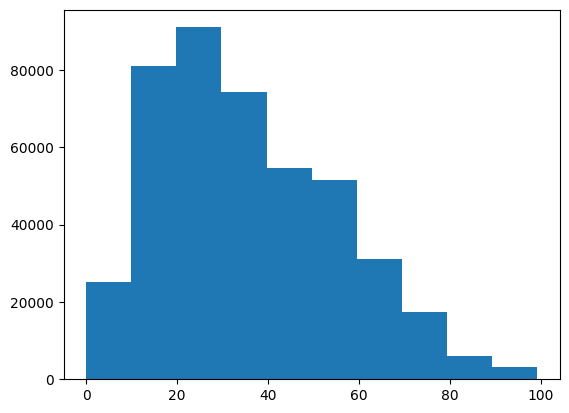

In [ ]:
plt.hist(df['fare_amount'])
plt.show()

In [ ]:
for col in ['fare_amount','trip_distance']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower_bound=q1-1.5*IQR
    upper_bound=q3+1.5*IQR
    
    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [ ]:
df

,passenger_count,payment_type,fare_amount,trip_distance
0,1,1,6.0,1.20
1,1,1,7.0,1.20
2,1,1,6.0,0.60
3,1,1,5.5,0.80
5,1,2,2.5,0.03
...,...,...,...,...
24548904,4,2,60.0,16.67
24549011,4,2,41.0,14.72
24549112,2,1,25.0,2.08
24549137,4,1,10.0,0.01


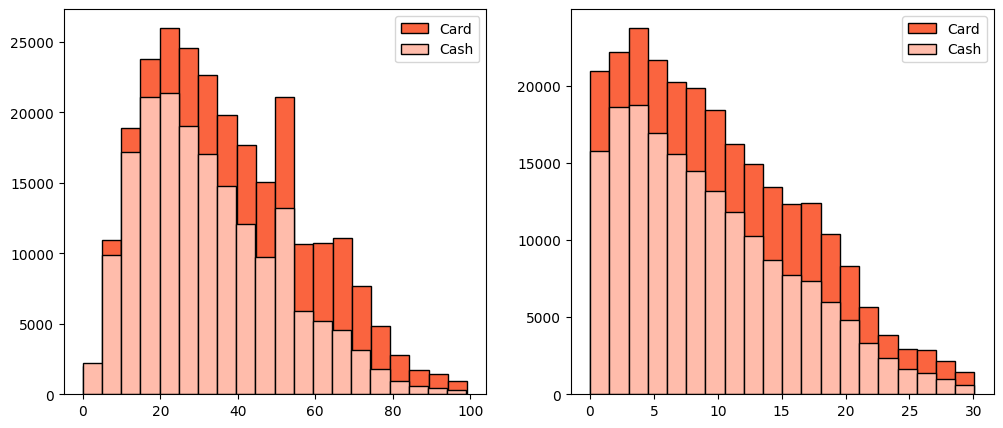

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(df[df['payment_type']==1]['fare_amount'],histtype='barstacked', bins=20, edgecolor='k',color= '#FA643F',label='Card')
plt.hist(df[df['payment_type']==2]['fare_amount'],histtype='barstacked', bins=20, edgecolor='k',color= '#FFBCAB', label='Cash')
plt.legend()

plt.subplot(1,2,2)
plt.hist(df[df['payment_type']==1]['trip_distance'],histtype='barstacked', bins=20, edgecolor='k',color= '#FA643F',label='Card')
plt.hist(df[df['payment_type']==2]['trip_distance'],histtype='barstacked', bins=20, edgecolor='k',color= '#FFBCAB', label='Cash')
plt.legend()
plt.show()

In [ ]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount            trip_distance          
                    mean        std          mean       std
payment_type                                               
1              37.427389  20.049629     10.049357  6.894336
2              32.795566  18.170284      9.238703  6.540509

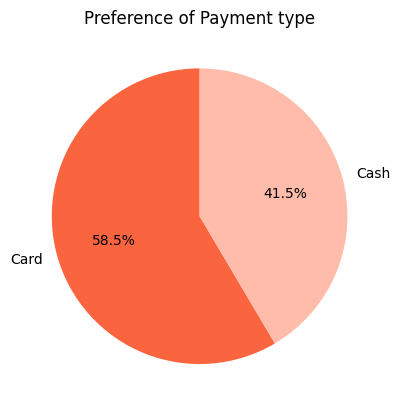

In [ ]:
plt.title('Preference of Payment type')
plt.pie(df['payment_type'].value_counts(normalize=True),labels=['Card','Cash'],
        startangle=90,autopct='%1.1f%%',colors=['#FA643F','#FFBCAB'])
plt.show()

In [ ]:
passenger_count= df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'}, inplace=True)
passenger_count.reset_index(inplace=True)

In [ ]:
passenger_count['perc']=(passenger_count['count']/passenger_count['count'].sum())*100

In [ ]:
passenger_count

,payment_type,passenger_count,count,perc
0,1,1,105620,24.289952
1,1,2,58150,13.373042
2,1,3,33968,7.811789
3,1,4,24366,5.603569
4,1,5,32265,7.420141
5,2,1,73961,17.009176
6,2,2,41571,9.560288
7,2,3,24705,5.681531
8,2,4,17641,4.056988
9,2,5,22583,5.193524


In [116]:
df1= pd.DataFrame(columns=['payment_type',1,2,3,4,5])
df1['payment_type']= ['Card','Cash']
df1.iloc[0,1:]=passenger_count.iloc[0:5,-1]
df1.iloc[1,1:]=passenger_count.iloc[5:,-1]
df1

,payment_type,1,2,3,4,5
0,Card,24.289952,13.373042,7.811789,5.603569,7.420141
1,Cash,17.009176,9.560288,5.681531,4.056988,5.193524


<Axes: ylabel='payment_type'>

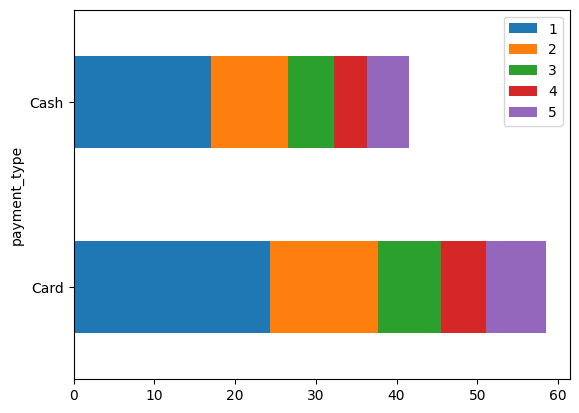

In [118]:
df1.plot(x='payment_type',kind='barh', stacked=True)


Null hypothesis: There is no difference in avg fare between customers who use credit card and customers who use cash

Alternate Hypothesis: There is difference in avg fare between customers who use credit card and customers who use cash

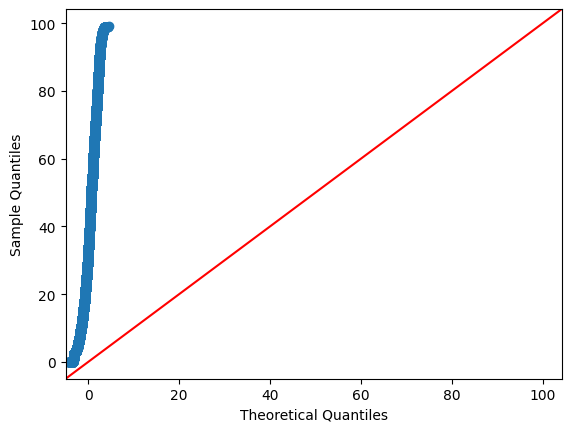

In [123]:
import statsmodels.api as sm
sm.qqplot(df['fare_amount'], line='45')
plt.show()

As the data is not normal, we will use T-test

In [130]:
card_sample=df[df['payment_type']==1]['fare_amount']
cash_sample=df[df['payment_type']==2]['fare_amount']

In [136]:
t_stats=p_value=st.ttest_ind(a=card_sample,b=cash_sample, equal_var=False)
print('T statistics: ',t_stats,'p-value:', p_value)

T statistics:  TtestResult(statistic=np.float64(79.32011807325708), pvalue=np.float64(0.0), df=np.float64(409893.3673790082)) p-value: TtestResult(statistic=np.float64(79.32011807325708), pvalue=np.float64(0.0), df=np.float64(409893.3673790082))


Since the p value: 0.0 is less than our significance value ie: 0.05, hence we reject the null hypothesis.